In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import healpy as hp
import sys
sys.path.append('/Users/mehdi/github/LSSutils')
from LSSutils import dataviz as dv
from glob import glob

camb is not installed!


In [49]:
plt.rc('font', family='serif', size=15)

In [2]:
from LSSutils.catalogs.datarelease import cols_dr8_rand as labels

In [62]:
!ls -lt ../pk*zbin1*.txt

-rw-r--r--  1 mehdi  staff  6556 Mar 12 08:44 ../pk_9_v0_0.1_none_none_none_zbin1_512_red_1.txt
-rw-r--r--  1 mehdi  staff  6523 Mar 12 08:44 ../pk_9_v0_0.1_none_none_none_zbin1_512_red_0.txt
-rw-r--r--  1 mehdi  staff  6565 Mar 12 08:44 ../pk_8_v0_0.1_none_none_none_zbin1_512_red_1.txt
-rw-r--r--  1 mehdi  staff  6534 Mar 12 08:44 ../pk_8_v0_0.1_none_none_none_zbin1_512_red_0.txt
-rw-r--r--  1 mehdi  staff  6572 Mar 12 08:44 ../pk_7_v0_0.1_none_none_none_zbin1_512_red_1.txt
-rw-r--r--  1 mehdi  staff  6504 Mar 12 08:44 ../pk_7_v0_0.1_none_none_none_zbin1_512_red_0.txt
-rw-r--r--  1 mehdi  staff  6564 Mar 12 08:44 ../pk_6_v0_0.1_none_none_none_zbin1_512_red_1.txt
-rw-r--r--  1 mehdi  staff  6507 Mar 12 08:44 ../pk_6_v0_0.1_none_none_none_zbin1_512_red_0.txt
-rw-r--r--  1 mehdi  staff  6576 Mar 12 08:44 ../pk_5_v0_0.1_none_none_none_zbin1_512_red_1.txt
-rw-r--r--  1 mehdi  staff  6559 Mar 12 08:44 ../pk_5_v0_0.1_none_none_none_zbin1_512_red_0.txt
-rw-r--r--  1 mehdi  staff  6579 Mar 12 

In [63]:
#pks = glob('../pk_v0_2_*.txt')
pks = glob('../pk_2_*all*.txt')

In [64]:
pks

['../pk_2_v0_0.1_nn_known_lowhigh_all_512_red_1.txt',
 '../pk_2_v0_0.1_nn_plain_lowhigh_all_512_red_1.txt',
 '../pk_2_v0_0.1_nn_known_all_all_512_red_1.txt',
 '../pk_2_v0_0.1_none_none_none_all_512_red_0.txt',
 '../pk_2_v0_0.1_none_none_none_all_512_red_1.txt',
 '../pk_2_v0_0.1_nn_plain_all_all_512_red_1.txt',
 '../pk_2_v0_0.1_nn_ablation_lowhigh_all_512_red_1.txt']

In [4]:
import numpy as np

(52, 5)
(52, 5)
(52, 5)


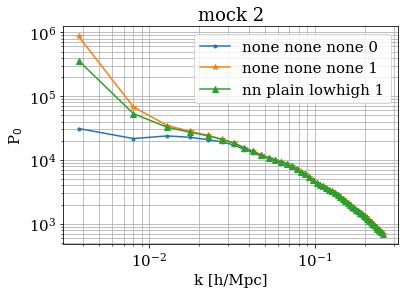

In [69]:
pks = ['../pk_2_v0_0.1_none_none_none_all_512_red_0.txt', #'../pk_2_v0_0.1_nn_known_lowhigh_all_512_red_1.txt',
        '../pk_2_v0_0.1_none_none_none_all_512_red_1.txt',
       '../pk_2_v0_0.1_nn_plain_lowhigh_all_512_red_1.txt']#'../pk_2_v0_0.1_nn_plain_lowhigh_all_512_red_1.txt',
#         #'../pk_2_v0_0.1_nn_plain_lowhigh_all_512_red_1.txt'
#          #
#          #
        
        
#          #'../pk_2_v0_0.1_nn_plain_all_all_512_red_1.txt',
#          #'../pk_2_v0_0.1_nn_ablation_lowhigh_all_512_red_1.txt']

mk = 10*['.', '*', '^', '+', 's']
j = 0
for pki in pks:
    #plt.figure()
    model = pki.split('_')[4]
    templ = pki.split('_')[5]
    split = pki.split('_')[6]
    red = pki.split('_')[-1][0]

    title = ' '.join([model, templ, split, red])
    #title = pki
    dpki = np.loadtxt(pki)
    print(dpki.shape)
    plt.loglog(dpki[:,0], dpki[:,1], marker=mk[j], label=title)

    j += 1
plt.legend(bbox_to_anchor=(1., 1.))
plt.title('mock 2')
plt.ylabel(r'P$_{0}$')
plt.xlabel('k [h/Mpc]')
plt.grid(which='both')
plt.savefig('pk_mock2.png', dpi=300, bbox_inches='tight')

In [27]:
pkvp6b = glob('../v0.6/pk_v0_*_red_0_0.6.txt')
pkvp6a = glob('../v0.6/pk_v0_*_red_1_0.6.txt')

In [28]:
def readall(pklist):
    pka = []
    for pki in pklist:
        pka.append(np.loadtxt(pki))
    return np.array(pka)

In [29]:
pkb = readall(pkvp6b)
pka = readall(pkvp6a)

In [33]:
pkb.shape

(99, 52, 5)

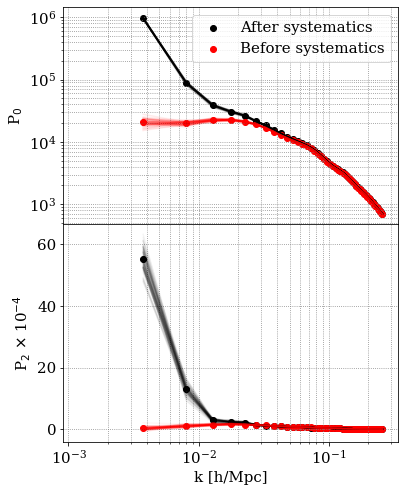

In [60]:
fig, ax = plt.subplots(nrows=2, figsize=(6, 8), sharex=True)
fig.subplots_adjust(hspace=0.0)
colors = ['k', 'r']
labels = ['After systematics', 'Before systematics']

for i, pki in enumerate([pka, pkb]):
    for j in range(pki.shape[0]):
        ax[0].plot(pki[0, :, 0], pki[j, :, 1], alpha=0.04, color=colors[i])
        ax[1].plot(pki[0, :, 0], pki[j, :, 2]/1.0e4, alpha=0.04, color=colors[i])
        
    ax[0].scatter(pki[0,:,0], np.mean(pki[:, :, 1], axis=0), color=colors[i], label=labels[i], marker='o')
    ax[1].scatter(pki[0,:,0], np.mean(pki[:, :, 2], axis=0)/1.0e4, color=colors[i], marker='o')

for axi in ax:
    axi.grid(True, ls=':', color='grey', which='both')

ax[0].legend()
ax[0].set(xscale='log', yscale='log', ylabel=r'P$_{0}$')
ax[1].set(xscale='log',  ylabel=r'P$_{2}$ $\times$ 10$^{-4}$', xlabel='k [h/Mpc]')
fig.savefig('./pks_v0.6.png', dpi=300, bbox_inches='tight')

In [30]:
pkb.shape

(99, 52, 5)

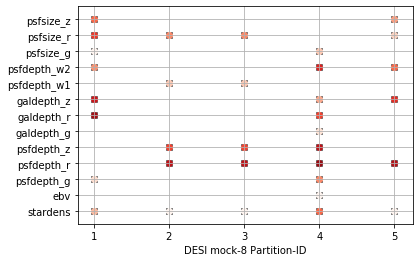

In [3]:
dv.get_selected_maps(glob('ablation/desi_mock.log_fold*.npy'),
                    ['DESI mock-8'], 
                    labels=labels)

835.936211192585 -1.7948228139341715
858.166530758011 -4.821728164684513
835.9385911559402 -1.4048063973393088
795.2783003193908 -0.12307013493528807
802.905258606239 -1.4039462202564135


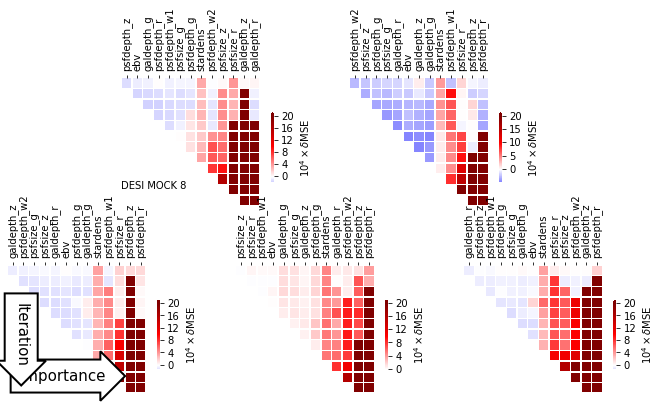

In [4]:
dv.ablation_plot_all(glob('ablation/desi_mock.log_fold*.npy'),
                title='DESI MOCK 8', labels=labels)

In [2]:
lists = glob('regression/*/*-weights.hp256.fits')
names = []
wmaps = []
for g in lists:
    names.append(g)
    wmaps.append(hp.read_map(g, verbose=False))

/Users/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


0
True
1
False
2
False
3
False
4
False


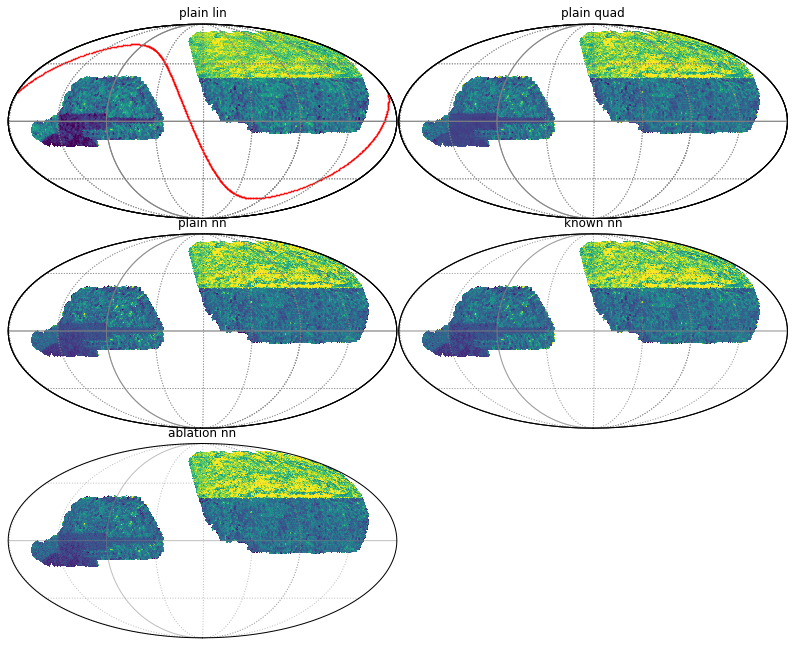

In [11]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(14, 12))
ax = ax.flatten()
fig.subplots_adjust(wspace=0.0, hspace=-0.1)

def fixunit(fwmap):
    return ' '.join([fwmap.split('/')[1].split('_')[1],\
                     fwmap.split('/')[-1].split('-')[0]])

for i, wmap in enumerate(wmaps):
    print(i)
    galaxy = False if i != 0 else True
    print(galaxy)
    wmap[wmap==0] = hp.UNSEEN
    dv.hpmollview(wmap, 
              fixunit(names[i]),
              [fig, ax[i]],
              title=fixunit(names[i]),
              rot=-89, 
              max=1.1, min=0.9,
              badcolor='w',
              cmap=plt.cm.viridis,
              galaxy=galaxy, 
              cbar=False)
    ax[i].text(0.2, 0.2, fixunit(names[i]), transform=ax[i].transAxes)

fig.delaxes(ax[-1])